<a href="https://colab.research.google.com/github/zainabzr/MoMA-Project-2023/blob/main/Exploring_Gender_and_Nationality_Narratives_in_the_Halls_of_MoMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
%reload_ext google.colab.data_table
from google.colab.data_table import DataTable
DataTable.max_columns = 30

In [ ]:
#Reading data. txt file with all values separated by ','
df = pd.read_csv('/content/Artworks.txt', sep = ',')

### Initial data analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140848 entries, 0 to 140847
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Title               140809 non-null  object 
 1   Artist              139632 non-null  object 
 2   ConstituentID       139632 non-null  object 
 3   ArtistBio           135023 non-null  object 
 4   Nationality         139632 non-null  object 
 5   BeginDate           139632 non-null  object 
 6   EndDate             139632 non-null  object 
 7   Gender              139632 non-null  object 
 8   Date                138743 non-null  object 
 9   Medium              131217 non-null  object 
 10  Dimensions          131596 non-null  object 
 11  CreditLine          138985 non-null  object 
 12  AccessionNumber     140848 non-null  object 
 13  Classification      140847 non-null  object 
 14  Department          140848 non-null  object 
 15  DateAcquired        134166 non-nul

There are 29 columns in this dataset, and 140848 values. Dataset includes columns that are not required for this analysis.

In [ ]:
df.head()

Title  \
0  Ferdinandsbrücke Project, Vienna, Austria (Ele...   
1  City of Music, National Superior Conservatory ...   
2  Villa near Vienna Project, Outside Vienna, Aus...   
3  The Manhattan Transcripts Project, New York, N...   
4  Villa, project, outside Vienna, Austria, Exter...   

                     Artist ConstituentID  \
0               Otto Wagner          6210   
1  Christian de Portzamparc          7470   
2                Emil Hoppe          7605   
3           Bernard Tschumi          7056   
4                Emil Hoppe          7605   

                                   ArtistBio Nationality BeginDate EndDate  \
0                      (Austrian, 1841–1918)  (Austrian)    (1841)  (1918)   
1                        (French, born 1944)    (French)    (1944)     (0)   
2                      (Austrian, 1876–1957)  (Austrian)    (1876)  (1957)   
3  (French and Swiss, born Switzerland 1944)          ()    (1944)     (0)   
4                      (Austrian, 1876–1957)  (Austrian)    (1876)  (1957)   

   Gender  Date                                             Medium  ...  \
0  (Male)  1896      Ink and cut-and-pasted painted pages on paper  ...   
1  (Male)  1987                  Paint and colored pencil on print  ...   
2  (Male)  1903  Graphite, pen, color pencil, ink, and gouache ...  ...   
3  (Male)  1980  Photographic reproduction with colored synthet...  ...   
4  (Male)  1903  Graphite, color pencil, ink, and gouache on tr...  ...   

                                        ThumbnailURL Circumference (cm)  \
0  http://www.moma.org/media/W1siZiIsIjUyNzc3MCJd...                NaN   
1  http://www.moma.org/media/W1siZiIsIjUyNzM3NCJd...                NaN   
2  http://www.moma.org/media/W1siZiIsIjUyNzM3NSJd...                NaN   
3  http://www.moma.org/media/W1siZiIsIjUyNzQ3NCJd...                NaN   
4  http://www.moma.org/media/W1siZiIsIjUyNzQ3NSJd...                NaN   

  Depth (cm) Diameter (cm) Height (cm) Length (cm) Weight (kg)  Width (cm)  \
0        NaN           NaN     48.6000         NaN         NaN    168.9000   
1        NaN           NaN     40.6401         NaN         NaN     29.8451   
2        NaN           NaN     34.3000         NaN         NaN     31.8000   
3        NaN           NaN     50.8000         NaN         NaN     50.8000   
4        NaN           NaN     38.4000         NaN         NaN     19.1000   

  Seat Height (cm) Duration (sec.)  
0              NaN             NaN  
1              NaN             NaN  
2              NaN             NaN  
3              NaN             NaN  
4              NaN             NaN  

[5 rows x 29 columns]

In [ ]:
df.isnull().sum()

Title                     39
Artist                  1216
ConstituentID           1216
ArtistBio               5825
Nationality             1216
BeginDate               1216
EndDate                 1216
Gender                  1216
Date                    2105
Medium                  9631
Dimensions              9252
CreditLine              1863
AccessionNumber            0
Classification             1
Department                 0
DateAcquired            6682
Cataloged                  0
ObjectID                   0
URL                    46692
ThumbnailURL           57499
Circumference (cm)    140838
Depth (cm)            124793
Diameter (cm)         139384
Height (cm)            16981
Length (cm)           140106
Weight (kg)           140561
Width (cm)             17902
Seat Height (cm)      140848
Duration (sec.)       138906
dtype: int64

Lots of null values. Data Cleaning required.

In [ ]:
# Removing unnecessary columns
df = df.drop(columns=['Medium','Dimensions','CreditLine','AccessionNumber','Classification','Department','URL','ThumbnailURL','Circumference (cm)','Depth (cm)','Diameter (cm)','Height (cm)','Length (cm)','Weight (kg)','Width (cm)','Seat Height (cm)','Duration (sec.)'])

In [ ]:
df.head(10)

Title  \
0  Ferdinandsbrücke Project, Vienna, Austria (Ele...   
1  City of Music, National Superior Conservatory ...   
2  Villa near Vienna Project, Outside Vienna, Aus...   
3  The Manhattan Transcripts Project, New York, N...   
4  Villa, project, outside Vienna, Austria, Exter...   
5  The Manhattan Transcripts Project, New York, N...   
6  The Manhattan Transcripts Project, New York, N...   
7  The Manhattan Transcripts Project, New York, N...   
8  The Manhattan Transcripts Project, New York, N...   
9  The Manhattan Transcripts Project, New York, N...   

                     Artist ConstituentID  \
0               Otto Wagner          6210   
1  Christian de Portzamparc          7470   
2                Emil Hoppe          7605   
3           Bernard Tschumi          7056   
4                Emil Hoppe          7605   
5           Bernard Tschumi          7056   
6           Bernard Tschumi          7056   
7           Bernard Tschumi          7056   
8           Bernard Tschumi          7056   
9           Bernard Tschumi          7056   

                                   ArtistBio Nationality BeginDate EndDate  \
0                      (Austrian, 1841–1918)  (Austrian)    (1841)  (1918)   
1                        (French, born 1944)    (French)    (1944)     (0)   
2                      (Austrian, 1876–1957)  (Austrian)    (1876)  (1957)   
3  (French and Swiss, born Switzerland 1944)          ()    (1944)     (0)   
4                      (Austrian, 1876–1957)  (Austrian)    (1876)  (1957)   
5  (French and Swiss, born Switzerland 1944)          ()    (1944)     (0)   
6  (French and Swiss, born Switzerland 1944)          ()    (1944)     (0)   
7  (French and Swiss, born Switzerland 1944)          ()    (1944)     (0)   
8  (French and Swiss, born Switzerland 1944)          ()    (1944)     (0)   
9  (French and Swiss, born Switzerland 1944)          ()    (1944)     (0)   

   Gender     Date DateAcquired Cataloged  ObjectID  
0  (Male)     1896   1996-04-09         Y         2  
1  (Male)     1987   1995-01-17         Y         3  
2  (Male)     1903   1997-01-15         Y         4  
3  (Male)     1980   1995-01-17         Y         5  
4  (Male)     1903   1997-01-15         Y         6  
5  (Male)  1976-77   1995-01-17         Y         7  
6  (Male)  1976-77   1995-01-17         Y         8  
7  (Male)  1976-77   1995-01-17         Y         9  
8  (Male)  1976-77   1995-01-17         Y        10  
9  (Male)  1976-77   1995-01-17         Y        11

This shows 2 things:
1. Necessary columns require data cleaning.
2. One artist can have multiple artworks at MoMA. I do not plan on using groupby for this because if an artist has more artworks shown, their gender and nationality is better represented.

In [ ]:
df.loc[df['Artist'] == 'Unidentified Artist'].count()

Title            670
Artist           670
ConstituentID    670
ArtistBio        670
Nationality      670
BeginDate        670
EndDate          670
Gender           670
Date             667
DateAcquired     666
Cataloged        670
ObjectID         670
dtype: int64

In [ ]:
# Checking and removing rows with information that is not necessary to the analysis
df.loc[(df['Artist'] == 'Unidentified Artist') & (df['Nationality'] == '(Nationality unknown)') & (df['Gender'] == '()')].count()

Title            662
Artist           662
ConstituentID    662
ArtistBio        662
Nationality      662
BeginDate        662
EndDate          662
Gender           662
Date             662
DateAcquired     658
Cataloged        662
ObjectID         662
dtype: int64

In [ ]:
df.drop(df.loc[(df['Artist'] == 'Unidentified Artist') & (df['Nationality'] == '(Nationality unknown)') & (df['Gender'] == '()')].index, inplace=True)

In [ ]:
df.loc[df['Artist'] == 'Unidentified Artist'].count()

Title            8
Artist           8
ConstituentID    8
ArtistBio        8
Nationality      8
BeginDate        8
EndDate          8
Gender           8
Date             5
DateAcquired     8
Cataloged        8
ObjectID         8
dtype: int64

In [ ]:
df.loc[df['Artist'] == 'Unidentified Designer'].count()

Title            432
Artist           432
ConstituentID    432
ArtistBio        432
Nationality      432
BeginDate        432
EndDate          432
Gender           432
Date             431
DateAcquired     429
Cataloged        432
ObjectID         432
dtype: int64

In [ ]:
df.loc[(df['Artist'] == 'Unidentified Designer') & (df['Nationality'] == '(Nationality unknown)') & (df['Gender'] == '()')].count()

Title            214
Artist           214
ConstituentID    214
ArtistBio        214
Nationality      214
BeginDate        214
EndDate          214
Gender           214
Date             213
DateAcquired     211
Cataloged        214
ObjectID         214
dtype: int64

In [ ]:
df.drop(df.loc[(df['Artist'] == 'Unidentified Designer') & (df['Nationality'] == '(Nationality unknown)') & (df['Gender'] == '()')].index, inplace=True)

In [ ]:
df.drop(df.loc[(df['ArtistBio'] == '(Nationality unknown)') & (df['Nationality'] == '(Nationality unknown)') & (df['Gender'] == '()')].index, inplace=True)

## Code for Research Question: What is the gender distribution of artists in the MOMA collection?

In [ ]:
# Creating dataframe with columns relevant to the question
genders = df[['Artist', 'Gender']].copy()
genders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139823 entries, 0 to 140847
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Artist  138607 non-null  object
 1   Gender  138607 non-null  object
dtypes: object(2)
memory usage: 3.2+ MB


In [ ]:
# Removing rows with information not necessary to the analysis
genders.drop(genders.loc[(genders['Artist'] == 'Unidentified Designer') & (genders['Gender'] == '()')].index, inplace=True)

In [ ]:
genders.drop(genders.loc[(genders['Artist'] == 'Unidentified Artist') & (genders['Gender'] == '()')].index, inplace=True)

In [ ]:
genders.isnull().sum()

Artist    1216
Gender    1216
dtype: int64

In [ ]:
# Dropping nulls
genders = genders.dropna()

In [ ]:
genders['Gender'].value_counts().to_frame()

Gender
(Male)                                              105646
(Female)                                             18828
()                                                    6109
(Male) (Male)                                         1644
(Male) (Male) (Male)                                  1067
...                                                    ...
(Male) () () () (Male) ()                                1
(Male) (Male) (Male) (Male) (Male) (Male) (Male...       1
(Male) (Female) (Male) (Male) (Male) (Male) (Ma...       1
(Female) (Male) (Male) (Male) (Male) (Male) (Ma...       1
() (Male) (Female) (Male) (Male) (Female) (Fema...       1

[412 rows x 1 columns]

The dataframe requires cleaning. The plan is to separate the multiple genders listed in a single value and repeat the corresponding count value for each of them.

In [ ]:
# Checking and removing information that is not necessary to the analysis
genders.loc[genders['Gender'] == '()'].value_counts().to_frame()

0
Artist                     Gender      
Unidentified photographer  ()      2738
Album-miscellaneous        ()       385
Various Artists            ()       321
Unidentified Artists       ()       201
Russian Book Collection    ()        90
...                                 ...
Helmut Stockhammer         ()         1
Henrik Håkansson           ()         1
Henry Disston & Sons, Inc. ()         1
Hermann Steiner            ()         1
Émile-René Ménard          ()         1

[992 rows x 1 columns]

In [ ]:
genders.drop(genders.loc[genders['Gender'] == '()'].index, inplace=True)

In [ ]:
genders['Gender'].value_counts().to_frame()

Gender
(Male)                                              105646
(Female)                                             18828
(Male) (Male)                                         1644
(Male) (Male) (Male)                                  1067
(Male) ()                                              838
...                                                    ...
(Male) () () () (Male) ()                                1
(Male) (Male) (Male) (Male) (Male) (Male) (Male...       1
(Male) (Female) (Male) (Male) (Male) (Male) (Ma...       1
(Female) (Male) (Male) (Male) (Male) (Male) (Ma...       1
() (Male) (Female) (Male) (Male) (Female) (Fema...       1

[411 rows x 1 columns]

In [ ]:
# Cleaning genders dataframe by stripping the brackets from each value in the column
# Making a column out of this
genders['Cleaned_Genders'] = genders['Gender'].apply(
    lambda x: [gen.strip() for gen in x.strip('()').split('(') if gen]
)

# Making a list with the column values and removing brackets
all_genders = [gen for sublist in genders["Cleaned_Genders"] for gen in sublist]
all_genders = [gen.lstrip('(').rstrip(')') for gen in all_genders]

# Counting each unique gender label
gender_counts = pd.Series(all_genders).value_counts()

# Creating a dataframe out of it
genders_df = pd.DataFrame(gender_counts, columns=['Count'])
genders_df = genders_df.rename_axis('Gender')

genders_df

Count
Gender            
Male        121634
Female       22567
              2454
male            45
Non-Binary      12
female           2
Non-binary       1

In [ ]:
# Checking nulls because there is a seemingly empty cell in gender
genders_df.index.isnull().sum()

0

In [ ]:
# If not null then empty string? Checking
genders_df[genders_df.index.str.strip() == ""]

Count
Gender       
         2454

In [ ]:
genders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Male to Non-binary
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   7 non-null      int64
dtypes: int64(1)
memory usage: 112.0+ bytes


In [ ]:
# Trying to remove empty string cell by assigning null
genders_df.index = genders_df.index.where(genders_df.index != '', None)


genders_df.index.isnull().any()

True

In [ ]:
# Dropping nulls
genders_df = genders_df.dropna()

In [ ]:
genders_df

Count
Gender            
Male        121634
Female       22567
None          2454
male            45
Non-Binary      12
female           2
Non-binary       1

In [ ]:
# Previous method didn't work so selecting only non-nulls
genders_df = genders_df[genders_df.index.notnull()]
genders_df

Count
Gender            
Male        121634
Female       22567
male            45
Non-Binary      12
female           2
Non-binary       1

In [ ]:
genders_df = genders_df.reset_index()

# Normalizing values in the gender column to account for spelling differences
genders_df['Gender']= genders_df['Gender'].str.lower().str.title()

# Grouping the genders and summing their counts
genders_df = genders_df.groupby('Gender', as_index=False)['Count'].sum()
genders_df = genders_df.sort_values(by=['Count'], ascending=False)

### Pie Chart for Gender Representation

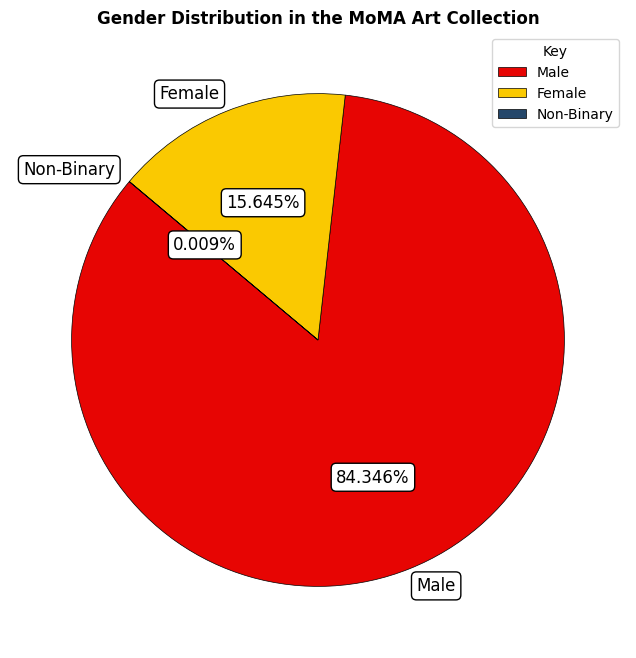

In [ ]:
# Making a pie chart for Gender representation
import matplotlib.pyplot as plt
colors = ['#E70503', '#fac901', '#25476A']

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    genders_df['Count'],
    labels=genders_df['Gender'],
    colors=colors,
    autopct='%1.3f%%',
    startangle=140,
    wedgeprops=dict(edgecolor='black', linewidth=0.5),
    pctdistance=0.6,
    labeldistance=1.075
)

# Needed text-boxes as labels since Non-binary slice too small
for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_bbox(dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Adding a legend
plt.legend(loc='upper right', labels=genders_df['Gender'], title='Key')

plt.title("Gender Distribution in the MoMA Art Collection", fontweight='bold')
plt.show()

In [ ]:
df.loc[(df['Gender'] == '(Non-Binary)') | (df['Gender'] == '(Non-binary)')]['Artist'].value_counts()

Sadie Benning    10
Patrick Staff     1
Tourmaline        1
Name: Artist, dtype: int64

In [ ]:
df.loc[(df['Gender'] == '(Non-Binary)') | (df['Gender'] == '(Non-binary)')]

Title         Artist ConstituentID  \
93594              The Judy Spots  Sadie Benning         34902   
93595                     Jollies  Sadie Benning         34902   
93598   If Every Girl Had a Diary  Sadie Benning         34902   
93599               Living Inside  Sadie Benning         34902   
93604           Flat is Beautiful  Sadie Benning         34902   
93605                  A New Year  Sadie Benning         34902   
93607            Me and Rubyfruit  Sadie Benning         34902   
93625                 German Song  Sadie Benning         34902   
120252                Julie's Rug  Sadie Benning         34902   
128883                 Shared Eye  Sadie Benning         34902   
132075                Weed Killer  Patrick Staff         74347   
137386                    Salacia     Tourmaline        132720   

                    ArtistBio Nationality BeginDate EndDate        Gender  \
93594   (American, born 1973)  (American)    (1973)     (0)  (Non-Binary)   
93595   (American, born 1973)  (American)    (1973)     (0)  (Non-Binary)   
93598   (American, born 1973)  (American)    (1973)     (0)  (Non-Binary)   
93599   (American, born 1973)  (American)    (1973)     (0)  (Non-Binary)   
93604   (American, born 1973)  (American)    (1973)     (0)  (Non-Binary)   
93605   (American, born 1973)  (American)    (1973)     (0)  (Non-Binary)   
93607   (American, born 1973)  (American)    (1973)     (0)  (Non-Binary)   
93625   (American, born 1973)  (American)    (1973)     (0)  (Non-Binary)   
120252  (American, born 1973)  (American)    (1973)     (0)  (Non-Binary)   
128883  (American, born 1973)  (American)    (1973)     (0)  (Non-Binary)   
132075   (British, born 1987)   (British)    (1987)     (0)  (Non-Binary)   
137386  (American, born 1983)  (American)    (1983)     (0)  (Non-binary)   

        Date DateAcquired Cataloged  ObjectID  
93594   1995   2000-10-11         Y    118538  
93595   1990   2000-01-01         Y    118539  
93598   1990   2000-01-01         Y    118542  
93599   1989   2000-01-01         Y    118543  
93604   1998   2000-10-11         Y    118548  
93605   1989   2000-10-11         Y    118549  
93607   1990   2000-01-01         Y    118551  
93625   1995   2000-10-11         Y    118569  
120252  2014   2014-12-15         Y    187158  
128883  2016   2017-06-05         Y    222123  
132075  2017   2018-05-24         Y    283998  
137386  2019   2020-06-18         Y    415349

In [ ]:
df.loc[(df['Gender'] == '(Non-Binary)') | (df['Gender'] == '(Non-binary)')]['DateAcquired']

93594     2000-10-11
93595     2000-01-01
93598     2000-01-01
93599     2000-01-01
93604     2000-10-11
93605     2000-10-11
93607     2000-01-01
93625     2000-10-11
120252    2014-12-15
128883    2017-06-05
132075    2018-05-24
137386    2020-06-18
Name: DateAcquired, dtype: object

## Code for Research Question: What is the nationality distribution of artists in the MOMA collection?

In [ ]:
# Making the dataframe for nationality
nationality = df[['Nationality', 'ArtistBio']]
nationality

Nationality                                  ArtistBio
0       (Austrian)                      (Austrian, 1841–1918)
1         (French)                        (French, born 1944)
2       (Austrian)                      (Austrian, 1876–1957)
3               ()  (French and Swiss, born Switzerland 1944)
4       (Austrian)                      (Austrian, 1876–1957)
...            ...                                        ...
140843  (American)                      (American, 1923–2015)
140844  (American)                      (American, 1923–2015)
140845  (American)                      (American, 1923–2015)
140846  (American)                      (American, 1923–2015)
140847  (American)                      (American, 1923–2015)

[139823 rows x 2 columns]

In [ ]:
# Checking for Nulls
nationality[nationality['Nationality'].isnull()]

Nationality ArtistBio
1354           NaN       NaN
1929           NaN       NaN
1939           NaN       NaN
2107           NaN       NaN
2469           NaN       NaN
...            ...       ...
137065         NaN       NaN
138123         NaN       NaN
138124         NaN       NaN
138136         NaN       NaN
139909         NaN       NaN

[1216 rows x 2 columns]

In [ ]:
# Dropping Nulls
nationality = nationality.dropna()

In [ ]:
nationality.loc[nationality['Nationality'] == '()']

Nationality                                          ArtistBio
3               ()          (French and Swiss, born Switzerland 1944)
5               ()          (French and Swiss, born Switzerland 1944)
6               ()          (French and Swiss, born Switzerland 1944)
7               ()          (French and Swiss, born Switzerland 1944)
8               ()          (French and Swiss, born Switzerland 1944)
...            ...                                                ...
139235          ()  (Enrolled member of the Seneca Nation of India...
139236          ()  (Enrolled member of the Seneca Nation of India...
139424          ()                        (formation c. 2016–ongoing)
139602          ()  (Enrolled member of the Seneca Nation of India...
139603          ()  (Enrolled member of the Seneca Nation of India...

[676 rows x 2 columns]

In [ ]:
nationality.drop(nationality.loc[(nationality['Nationality'] == '()') & (nationality['ArtistBio'] == '(Various)')].index, inplace = True)

<ipython-input-42-2eee173457da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nationality.drop(nationality.loc[(nationality['Nationality'] == '()') & (nationality['ArtistBio'] == '(Various)')].index, inplace = True)


In [ ]:
nationality.loc[nationality['Nationality'] == '()']

Nationality                                          ArtistBio
3               ()          (French and Swiss, born Switzerland 1944)
5               ()          (French and Swiss, born Switzerland 1944)
6               ()          (French and Swiss, born Switzerland 1944)
7               ()          (French and Swiss, born Switzerland 1944)
8               ()          (French and Swiss, born Switzerland 1944)
...            ...                                                ...
139235          ()  (Enrolled member of the Seneca Nation of India...
139236          ()  (Enrolled member of the Seneca Nation of India...
139424          ()                        (formation c. 2016–ongoing)
139602          ()  (Enrolled member of the Seneca Nation of India...
139603          ()  (Enrolled member of the Seneca Nation of India...

[291 rows x 2 columns]

In [ ]:
# Getting unique values for ArtistBio
filtered_df = nationality[nationality['Nationality'] == '()']
filtered_df['ArtistBio'].unique()

array(['(French and Swiss, born Switzerland 1944)', '(founded 1963)',
       '(English, established 1875)', '(est. 1911)', '(est. 1808)',
       '(est. 1868)', '(est. 1952)', '(Italian, founded 1936)',
       '(1911–1930)', '(est. 1731)', '(founded 1952)', '(American)',
       '(Russian, 1877–1957)', '(Russian, 1883–1941)',
       '(Russian, 1888–1929)', '(Russian, 1888–1979)',
       '(Russian, 1892–1954)', '(Russian–Lithuanian, 1875–1952)',
       '(1892–1947)', '(1937 – 1982)', '(Nationality unknown)',
       '(United States, active 1923–1952)',
       '(United States, established 1846)', '(Active 1921–1932)',
       '(Uruguayan, 1895–1983)', '(American, born 1933)', '(born 1926)',
       '(French, born Switzerland. 1889–1943)',
       '(German and French, founded 1994)', '(founded 1951)',
       '(est. 1971)', '(est. 1946)', '(1932–2000)', '(born 1957)',
       '(American, born 1950)', '(Puerto Rican, born 1946)',
       '(1865–1927)', '(1876–1949)', '(1968–1989)', '(est.1985)',
  

In [ ]:
# Cleaning values so that only those values remain where nationality = () and artistbio has nationality information
def clean_values(row):
    if row['Nationality'] == '()':
        if row['ArtistBio'] in ['(French and Swiss, born Switzerland 1944)',
       '(English, established 1875)','(Italian, founded 1936)','(American)',
       '(Russian, 1877–1957)', '(Russian, 1883–1941)',
       '(Russian, 1888–1929)', '(Russian, 1888–1979)',
       '(Russian, 1892–1954)', '(Russian–Lithuanian, 1875–1952)',
       '(United States, active 1923–1952)',
       '(United States, established 1846)',
       '(Uruguayan, 1895–1983)', '(American, born 1933)',
       '(French, born Switzerland. 1889–1943)',
       '(German and French, founded 1994)',
       '(American, born 1950)', '(Puerto Rican, born 1946)',
       '(UK, est. 1960)',
       '(American, born 1940)', '(Japanese, 1963–1964)',
       '(USA, est. 1975)', '(Czech, born 1946)', '(Czech, founded 1964)',
       '(USA, est. 1976)',
       '(South Africa, active 1983–1988)',
       '(French, 1872–1922)', '(Iceland, est. 1997)',
       '(American, born 1974)', '(American, born 1988)',
       '(American, born 1978)', '(American, born 1961)',
       '(American, born 1982)', '(American, born 1973)',
       '(American, born 1984)', '(American, born 1989)',
       '(American, 1928–2016)', '(Swiss, born 1957)',
       '(American, born 1962)', '(Swiss, 1926–1993)',
       '(Jordanian/Lebanese/British, born 1985)', '(American, born 1976)',
       '(American, born 1931)', '(French, 1841–1909)',
       '(American, born 1952)', '(American, born 1946)',
       '(USA, est. 1997)', '(Swedish, born 1968)', '(USA, est. 1979)', '(British, born 1952)',
       '(American, born 1971)', '(UK, est. 1975)', '(British, born 1958)',
       '(UK, est. 2002)', '(British, born 1975)','(British, born 1966)', '(British, born 1964)',
       '(British, born 1983)',
       '(Russian, 1892–1972)', '(American, 1874–1951)',
       '(Germany, est. 1970)', '(Canadian, 1984–2019)',
       '(Kiowa-Caddo, 1946–1978)',
       '(Enrolled member of the Seneca Nation of Indians, Heron Clan, born 1945)']:
            return row['ArtistBio']
        else:
            return None
    return row['ArtistBio']

nationality['ArtistBio'] = nationality.apply(lambda row: clean_values(row), axis=1)
# Dropping nulls
nationality.dropna(subset=['ArtistBio'], inplace=True)

nationality.loc[nationality['Nationality'] == '()']

<ipython-input-45-caea53fcd19d>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nationality['ArtistBio'] = nationality.apply(lambda row: clean_values(row), axis=1)
<ipython-input-45-caea53fcd19d>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nationality.dropna(subset=['ArtistBio'], inplace=True)


Nationality                                          ArtistBio
3               ()          (French and Swiss, born Switzerland 1944)
5               ()          (French and Swiss, born Switzerland 1944)
6               ()          (French and Swiss, born Switzerland 1944)
7               ()          (French and Swiss, born Switzerland 1944)
8               ()          (French and Swiss, born Switzerland 1944)
...            ...                                                ...
139234          ()  (Enrolled member of the Seneca Nation of India...
139235          ()  (Enrolled member of the Seneca Nation of India...
139236          ()  (Enrolled member of the Seneca Nation of India...
139602          ()  (Enrolled member of the Seneca Nation of India...
139603          ()  (Enrolled member of the Seneca Nation of India...

[211 rows x 2 columns]

In [ ]:
# Trying to replace () nationalities
# Making dictionary that I can use to define function
nationality_from_AB = {
       '(French and Swiss, born Switzerland 1944)': '(Swiss)',
       '(English, established 1875)': '(British)',
       '(Italian, founded 1936)': '(Italian)',
       '(American)': '(American)',
       '(Russian, 1877–1957)': '(Russian)',
       '(Russian, 1883–1941)': '(Russian)',
       '(Russian, 1888–1929)': '(Russian)',
       '(Russian, 1888–1979)': '(Russian)',
       '(Russian, 1892–1954)': '(Russian)',
       '(Russian–Lithuanian, 1875–1952)': '(Russian)',
       '(United States, active 1923–1952)': '(American)',
       '(United States, established 1846)': '(American)',
       '(Uruguayan, 1895–1983)': '(Uruguayan)',
       '(American, born 1933)': '(American)',
       '(French, born Switzerland. 1889–1943)': '(French)',
       '(German and French, founded 1994)': '(German)(French)',
       '(American, born 1950)': '(American)',
       '(Puerto Rican, born 1946)': '(Puerto Rican)',
       '(UK, est. 1960)': '(British)',
       '(American, born 1940)': '(American)',
       '(Japanese, 1963–1964)': '(Japanese)',
       '(USA, est. 1975)': '(American)',
       '(Czech, born 1946)': '(Czech)',
       '(Czech, founded 1964)': '(Czech)',
       '(USA, est. 1976)': '(American)',
       '(South Africa, active 1983–1988)': '(South African)',
       '(French, 1872–1922)': '(French)',
       '(Iceland, est. 1997)': '(Icelander)',
       '(American, born 1974)': '(American)',
       '(American, born 1988)': '(American)',
       '(American, born 1978)': '(American)',
       '(American, born 1961)': '(American)',
       '(American, born 1982)': '(American)',
       '(American, born 1973)': '(American)',
       '(American, born 1984)': '(American)',
       '(American, born 1989)': '(American)',
       '(American, 1928–2016)': '(American)',
       '(Swiss, born 1957)': '(Swiss)',
       '(American, born 1962)': '(American)',
       '(Swiss, 1926–1993)': '(Swiss)',
       '(Jordanian/Lebanese/British, born 1985)': '(Jordanian)',
       '(American, born 1976)': '(American)',
       '(American, born 1931)': '(American)',
       '(French, 1841–1909)': '(French)',
       '(American, born 1952)': '(American)',
       '(American, born 1946)': '(American)',
       '(USA, est. 1997)': '(American)',
       '(Swedish, born 1968)': '(Swedish)',
       '(USA, est. 1979)': '(American)',
       '(British, born 1952)': '(British)',
       '(American, born 1971)': '(American)',
       '(UK, est. 1975)': '(British)',
       '(British, born 1958)': '(British)',
       '(UK, est. 2002)': '(British)', '(British, born 1975)': '(British)','(British, born 1966)': '(British)', '(British, born 1964)': '(British)',
       '(British, born 1983)': '(British)',
       '(Russian, 1892–1972)': '(Russian)', '(American, 1874–1951)': '(American)',
       '(Germany, est. 1970)': '(German)', '(Canadian, 1984–2019)': '(Canadian)',
       '(Kiowa-Caddo, 1946–1978)': '(Kiowa-Caddo)',
       '(Enrolled member of the Seneca Nation of Indians, Heron Clan, born 1945)': '(Heron Clan)'
}

#Writing Function that uses dictionary above to replace nationality based on artistbio values
def replace_nationality(row):
    for keyword, replacement in nationality_from_AB.items():
        if keyword in row['ArtistBio']:
            return replacement
    return row['Nationality']


nationality['Nationality'] = nationality.apply(replace_nationality, axis=1)
nationality

<ipython-input-46-33614885c215>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nationality['Nationality'] = nationality.apply(replace_nationality, axis=1)


Nationality                                  ArtistBio
0       (Austrian)                      (Austrian, 1841–1918)
1         (French)                        (French, born 1944)
2       (Austrian)                      (Austrian, 1876–1957)
3          (Swiss)  (French and Swiss, born Switzerland 1944)
4       (Austrian)                      (Austrian, 1876–1957)
...            ...                                        ...
140843  (American)                      (American, 1923–2015)
140844  (American)                      (American, 1923–2015)
140845  (American)                      (American, 1923–2015)
140846  (American)                      (American, 1923–2015)
140847  (American)                      (American, 1923–2015)

[133533 rows x 2 columns]

In [ ]:
nationality['Nationality'].value_counts().to_frame()

Nationality
(American)                                                59063
(French)                                                  22814
(German)                                                   9512
(British)                                                  5764
(Spanish)                                                  3130
...                                                         ...
(American) (American) (American) (American) (Am...            1
(American) (American) (American) (American) (Am...            1
(French) (Irish) (American) (Swiss) (American) ...            1
(American) (British) (Nationality unknown) (Nat...            1
() (American) (American) (American) (American) ...            1

[905 rows x 1 columns]

In [ ]:
df.loc[df['Nationality'] == '(Nationality unknown)'].count()

Title            155
Artist           155
ConstituentID    155
ArtistBio        155
Nationality      155
BeginDate        155
EndDate          155
Gender           155
Date             142
DateAcquired     150
Cataloged        155
ObjectID         155
dtype: int64

In [ ]:
# Dropping Nationality unknown rows
rows_to_drop = nationality.loc[(nationality['Nationality'] == '(Nationality unknown)')]
nationality.drop(rows_to_drop.index, inplace=True)

<ipython-input-49-b22bdb536bf1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nationality.drop(rows_to_drop.index, inplace=True)


In [ ]:
nationality['Nationality'].value_counts().to_frame()

Nationality
(American)                                                59063
(French)                                                  22814
(German)                                                   9512
(British)                                                  5764
(Spanish)                                                  3130
...                                                         ...
(American) (American) (American) (American) (Am...            1
(American) (American) (American) (American) (Am...            1
(French) (Irish) (American) (Swiss) (American) ...            1
(American) (British) (Nationality unknown) (Nat...            1
() (American) (American) (American) (American) ...            1

[904 rows x 1 columns]

In [ ]:
# Cleaning dataframe to strip it of brackets and get a single value for each nationality
nationality["Cleaned_Nationalities"] = nationality["Nationality"].apply(
    lambda x: [nat.strip() for nat in x.strip("()").split("(") if nat]
)

all_nationalities = [nat for sublist in nationality["Cleaned_Nationalities"] for nat in sublist]
all_nationalities = [nat.lstrip("(").rstrip(")") for nat in all_nationalities]

nationality_counts = pd.Series(all_nationalities).value_counts()

# Creating dataframe for analysis
nationality_df = pd.DataFrame(nationality_counts, columns=["Count"])
nationality_df = nationality_df.rename_axis("Nationality")
nationality_df

<ipython-input-51-e5457a3ac5d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nationality["Cleaned_Nationalities"] = nationality["Nationality"].apply(


Count
Nationality       
American     64820
French       24316
German       10705
British       6773
Russian       3443
...            ...
Catalan          1
Ugandan          1
Afghan           1
Tanzanian        1
Kuwaiti          1

[123 rows x 1 columns]

In [ ]:
# Checking for nulls since a cell is seemingly empty
nationality_df.index.isnull().any()

False

In [ ]:
# Trying to remove empty string cell by assigning null
nationality_df.index = nationality_df.index.where(nationality_df.index != '', None)

nationality_df.index.isnull().any()

True

In [ ]:
nationality_df = nationality_df.dropna()

In [ ]:
nationality_df.index.isnull().any()

True

In [ ]:
# Selecting only non-null rows for the dataframe
nationality_df = nationality_df[nationality_df.index.notnull()]
nationality_df

Count
Nationality       
American     64820
French       24316
German       10705
British       6773
Russian       3443
...            ...
Catalan          1
Ugandan          1
Afghan           1
Tanzanian        1
Kuwaiti          1

[122 rows x 1 columns]

In [ ]:
nationality_df['Count'].sum()

143685

In [ ]:
# Making list of nationalities to map continents to
nationality_df.index.tolist()

['American',
 'French',
 'German',
 'British',
 'Russian',
 'Italian',
 'Spanish',
 'Japanese',
 'Swiss',
 'Argentine',
 'Dutch',
 'Belgian',
 'Mexican',
 'Austrian',
 'Canadian',
 'Brazilian',
 'Czech',
 'Colombian',
 'Hungarian',
 'Chinese',
 'Chilean',
 'Polish',
 'Danish',
 'Venezuelan',
 'Ivorian',
 'South African',
 'Swedish',
 'Israeli',
 'Croatian',
 'Australian',
 'Indian',
 'Serbian',
 'Cuban',
 'Finnish',
 'Norwegian',
 'Portuguese',
 'Uruguayan',
 'Ukrainian',
 'Peruvian',
 'Georgian',
 'Korean',
 'Romanian',
 'Slovak',
 'Latvian',
 'Egyptian',
 'Guatemalan',
 'Lebanese',
 'Icelandic',
 'Nationality unknown',
 'Costa Rican',
 'Sudanese',
 'Irish',
 'Scottish',
 'Slovenian',
 'Pakistani',
 'Turkish',
 'Greek',
 'Nigerian',
 'Native American',
 'Luxembourger',
 'Thai',
 'Bosnian',
 'Filipino',
 'Burkinabé',
 'Lithuanian',
 'Albanian',
 'Congolese',
 'Puerto Rican',
 'Iranian',
 'Haitian',
 'Malian',
 'New Zealander',
 'Macedonian',
 'Moroccan',
 'Palestinian',
 'Cameroonian',

In [ ]:
nationality_df.drop(nationality_df.loc[nationality_df.index == 'Nationality unknown'].index, inplace=True)

<ipython-input-59-60b99eebca91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nationality_df.drop(nationality_df.loc[nationality_df.index == 'Nationality unknown'].index, inplace=True)


In [ ]:
nationality_df.index.nunique()

121

### Bar Chart for Most Represented Nationalities

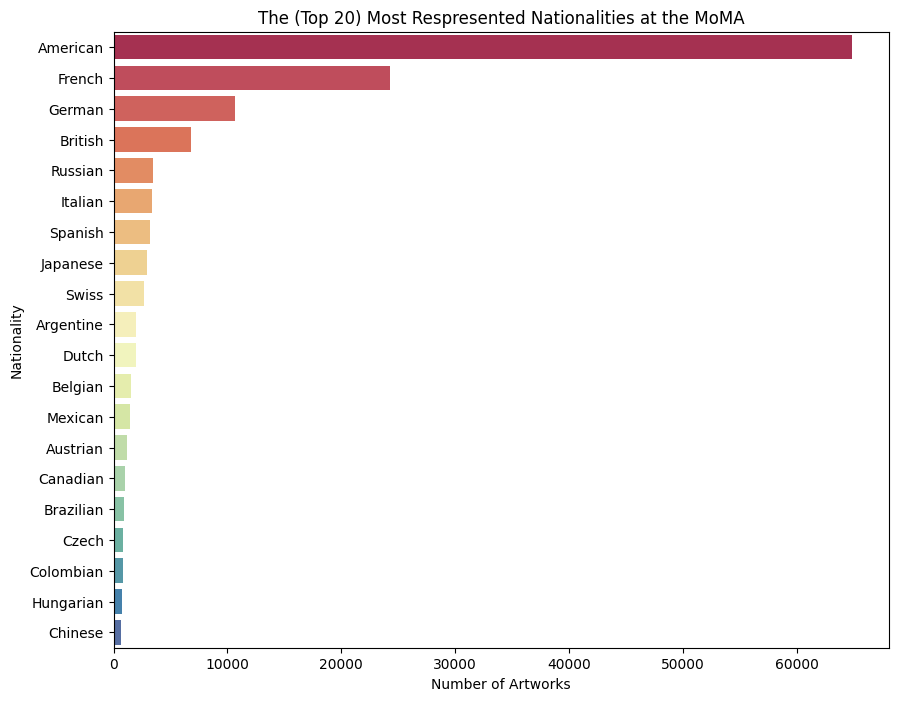

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sorted_df = nationality_df.sort_values(by="Count", ascending=False)

# Selecting 20 most represented nationalities and creating a horizonatal bar graph
topnat = 20
top_nationalities = sorted_df.head(topnat)

plt.figure(figsize=(10, 8))
sns.barplot(x="Count", y=top_nationalities.index, data=top_nationalities, palette="Spectral")

plt.xlabel("Number of Artworks")
plt.ylabel("Nationality")
plt.title(f"The (Top 20) Most Respresented Nationalities at the MoMA")
plt.show()

### Bar Chart for Least Represented Nationalities

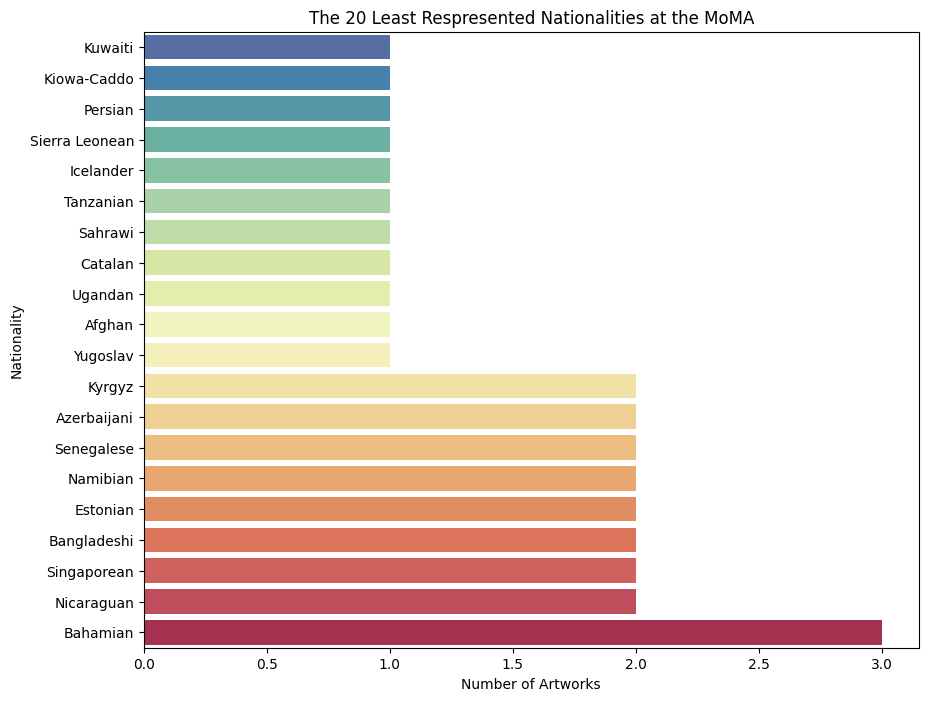

In [ ]:
sorted_df2 = nationality_df.sort_values(by='Count')

# Selecting 20 least represented nationalities to make a horizontal bar chart
num_least_represented = 20
selected_data = sorted_df2.head(num_least_represented)

plt.figure(figsize=(10, 8))
sns.barplot(x="Count", y=selected_data.index, data=selected_data, palette="Spectral_r")

plt.xlabel("Number of Artworks")
plt.ylabel("Nationality")
plt.title(f"The 20 Least Respresented Nationalities at the MoMA")
plt.show()

In [ ]:
# Creating a dictionary to map nationalities to continents for easier analysis
nationality_to_continent = {
    'American': 'North America',
    'French': 'Europe',
    'German': 'Europe',
    'British': 'Europe',
    'Russian': 'Europe',
    'Italian': 'Europe',
    'Spanish': 'Europe',
    'Japanese': 'Asia',
    'Swiss': 'Europe',
    'Argentine': 'South America',
    'Dutch': 'Europe',
    'Belgian': 'Europe',
    'Mexican': 'North America',
    'Austrian': 'Europe',
    'Canadian': 'North America',
    'Brazilian': 'South America',
    'Czech': 'Europe',
    'Colombian': 'South America',
    'Hungarian': 'Europe',
    'Chinese': 'Asia',
    'Chilean': 'South America',
    'Polish': 'Europe',
    'Danish': 'Europe',
    'Venezuelan': 'South America',
    'Ivorian': 'Africa',
    'South African': 'Africa',
    'Swedish': 'Europe',
    'Israeli': 'Asia',
    'Croatian': 'Europe',
    'Australian': 'Oceania',
    'Lebanese': 'Asia',
    'Costa Rican': 'Central America',
    'Sudanese': 'Africa',
    'Irish': 'Europe',
    'Scottish': 'Europe',
    'Slovenian': 'Europe',
    'Pakistani': 'Asia',
    'Turkish': 'Asia',
    'Greek': 'Europe',
    'Nigerian': 'Africa',
    'Native American': 'North America',
    'Luxembourger': 'Europe',
    'Thai': 'Asia',
    'Filipino': 'Asia',
    'Bosnian': 'Europe',
    'Burkinabé': 'Africa',
    'Puerto Rican': 'North America',
    'Lithuanian': 'Europe',
    'Albanian': 'Europe',
    'Haitian': 'North America',
    'Iranian': 'Asia',
    'Congolese': 'Africa',
    'Malian': 'Africa',
    'New Zealander': 'Oceania',
    'Moroccan': 'Africa',
    'Macedonian': 'Europe',
    'Palestinian': 'Asia',
    'Cameroonian': 'Africa',
    'Zimbabwean': 'Africa',
    'Iraqi': 'Asia',
    'Kenyan': 'Africa',
    'Algerian': 'Africa',
    'Tunisian': 'Africa',
    'Bulgarian': 'Europe',
    'Catalan': 'Europe',
    'Sahrawi': 'Africa',
    'Ugandan': 'Africa',
    'Afghan': 'Asia',
    'Kuwaiti': 'Asia',
    'Sierra Leonean': 'Africa',
    'Tanzanian': 'Africa',
    'Persian': 'Asia',
    'Kiowa-Caddo': 'North America',
    'Yugoslav': 'Europe',
    'Icelander': 'Europe'
}


# Creating a new 'Continent' column using the dictionary above
nationality_df["Continent"] = nationality_df.index.map(nationality_to_continent)
nationality_df

Count      Continent
Nationality                      
American     64820  North America
French       24316         Europe
German       10705         Europe
British       6773         Europe
Russian       3443         Europe
...            ...            ...
Catalan          1         Europe
Ugandan          1         Africa
Afghan           1           Asia
Tanzanian        1         Africa
Kuwaiti          1           Asia

[121 rows x 2 columns]

In [ ]:
nationality_df.loc[nationality_df['Count'] == 1]['Continent'].value_counts()

Africa           4
Asia             3
Europe           3
North America    1
Name: Continent, dtype: int64

In [ ]:
# Grouping by continent and summing up counts
continent_grouped = nationality_df.groupby("Continent")["Count"].sum()
continent_grouped

Continent
Africa              1180
Asia                4267
Central America       64
Europe             62995
North America      67354
Oceania              284
South America       4939
Name: Count, dtype: int64

In [ ]:
continent_grouped = nationality_df.groupby("Continent")["Count"].sum().to_frame()
continent_grouped

Count
Continent             
Africa            1180
Asia              4267
Central America     64
Europe           62995
North America    67354
Oceania            284
South America     4939

In [ ]:
!pip install squarify

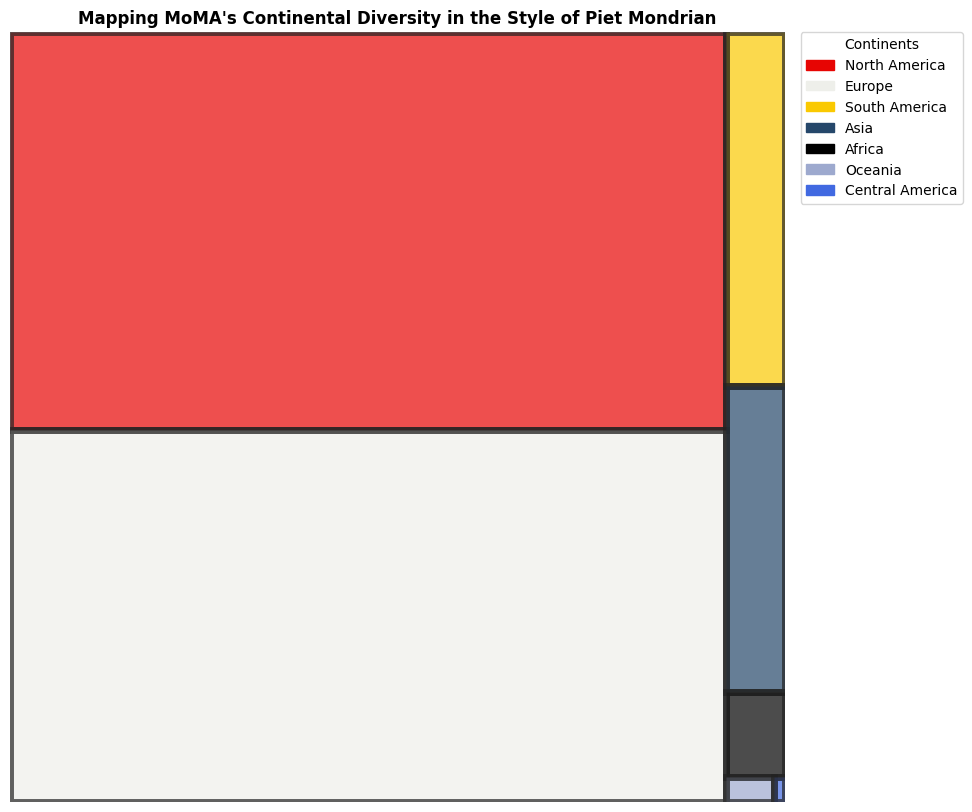

In [ ]:
# Creating a Tree Map
import matplotlib.pyplot as plt
import squarify
import matplotlib.patches as patches

continent_grouped = continent_grouped.sort_values(by="Count", ascending=False)

colors = ['#E70503', '#eeefea', '#fac901', '#25476A', '#000000', '#9DA9CE', '#4169e1']

plt.figure(figsize=(10, 10))
shapes = squarify.plot(sizes=continent_grouped['Count'], color=colors, alpha=0.7, bar_kwargs=dict(linewidth=5, edgecolor="#222222"))

# Since the boxes are too small, I am removing text and creating a legend instead
legend_patches = [patches.Patch(color=color, label=continent) for color, continent in zip(colors, continent_grouped.index)]
plt.legend(handles=legend_patches, title='Continents', loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0.0)

plt.gca().invert_yaxis()
plt.axis('off')
plt.title('Mapping MoMA\'s Continental Diversity in the Style of Piet Mondrian', fontweight="bold")
plt.show()

## Code for Research Question: Are there any significant shifts in the acquisition of art by artists with diverse backgrounds?

In [ ]:
# Creating dataframe
shifts = df[['DateAcquired', 'Gender', 'Nationality', 'ArtistBio']].copy()
shifts

DateAcquired  Gender Nationality  \
0        1996-04-09  (Male)  (Austrian)   
1        1995-01-17  (Male)    (French)   
2        1997-01-15  (Male)  (Austrian)   
3        1995-01-17  (Male)          ()   
4        1997-01-15  (Male)  (Austrian)   
...             ...     ...         ...   
140843   2020-12-09  (Male)  (American)   
140844   2020-12-09  (Male)  (American)   
140845   2020-12-09  (Male)  (American)   
140846   2020-12-09  (Male)  (American)   
140847   2020-12-09  (Male)  (American)   

                                        ArtistBio  
0                           (Austrian, 1841–1918)  
1                             (French, born 1944)  
2                           (Austrian, 1876–1957)  
3       (French and Swiss, born Switzerland 1944)  
4                           (Austrian, 1876–1957)  
...                                           ...  
140843                      (American, 1923–2015)  
140844                      (American, 1923–2015)  
140845                      (American, 1923–2015)  
140846                      (American, 1923–2015)  
140847                      (American, 1923–2015)  

[139823 rows x 4 columns]

In [ ]:
# Cleaning the DateAcquired column
shifts['DateAcquired'] = pd.to_datetime(shifts['DateAcquired'])

# Creating a YearAcquired column
shifts['YearAcquired'] = shifts['DateAcquired'].dt.year
shifts_df = shifts.dropna(subset=['YearAcquired'])
shifts_df

DateAcquired  Gender Nationality  \
0        1996-04-09  (Male)  (Austrian)   
1        1995-01-17  (Male)    (French)   
2        1997-01-15  (Male)  (Austrian)   
3        1995-01-17  (Male)          ()   
4        1997-01-15  (Male)  (Austrian)   
...             ...     ...         ...   
140843   2020-12-09  (Male)  (American)   
140844   2020-12-09  (Male)  (American)   
140845   2020-12-09  (Male)  (American)   
140846   2020-12-09  (Male)  (American)   
140847   2020-12-09  (Male)  (American)   

                                        ArtistBio  YearAcquired  
0                           (Austrian, 1841–1918)        1996.0  
1                             (French, born 1944)        1995.0  
2                           (Austrian, 1876–1957)        1997.0  
3       (French and Swiss, born Switzerland 1944)        1995.0  
4                           (Austrian, 1876–1957)        1997.0  
...                                           ...           ...  
140843                      (American, 1923–2015)        2020.0  
140844                      (American, 1923–2015)        2020.0  
140845                      (American, 1923–2015)        2020.0  
140846                      (American, 1923–2015)        2020.0  
140847                      (American, 1923–2015)        2020.0  

[133148 rows x 5 columns]

In [ ]:
# Removing null values where both Gender and Nationality are null
shifts_df.drop(shifts_df.loc[(shifts_df['Gender'].isnull()) & (shifts_df['Nationality'].isnull())].index,inplace=True)

<ipython-input-71-fe17381d2b28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shifts_df.drop(shifts_df.loc[(shifts_df['Gender'].isnull()) & (shifts_df['Nationality'].isnull())].index,inplace=True)


In [ ]:
# Creating dataframe with only the required columns
shifts_df = shifts_df[['YearAcquired', 'Gender', 'Nationality', 'ArtistBio']]
shifts_df

YearAcquired  Gender Nationality  \
0             1996.0  (Male)  (Austrian)   
1             1995.0  (Male)    (French)   
2             1997.0  (Male)  (Austrian)   
3             1995.0  (Male)          ()   
4             1997.0  (Male)  (Austrian)   
...              ...     ...         ...   
140843        2020.0  (Male)  (American)   
140844        2020.0  (Male)  (American)   
140845        2020.0  (Male)  (American)   
140846        2020.0  (Male)  (American)   
140847        2020.0  (Male)  (American)   

                                        ArtistBio  
0                           (Austrian, 1841–1918)  
1                             (French, born 1944)  
2                           (Austrian, 1876–1957)  
3       (French and Swiss, born Switzerland 1944)  
4                           (Austrian, 1876–1957)  
...                                           ...  
140843                      (American, 1923–2015)  
140844                      (American, 1923–2015)  
140845                      (American, 1923–2015)  
140846                      (American, 1923–2015)  
140847                      (American, 1923–2015)  

[132134 rows x 4 columns]

In [ ]:
# Transforming YearAcquired column
shifts_df['YearAcquired']=shifts_df['YearAcquired'].astype(int)

<ipython-input-73-c3c67c8a0e91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shifts_df['YearAcquired']=shifts_df['YearAcquired'].astype(int)


In [ ]:
shifts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132134 entries, 0 to 140847
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   YearAcquired  132134 non-null  int64 
 1   Gender        132134 non-null  object
 2   Nationality   132134 non-null  object
 3   ArtistBio     127687 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


In [ ]:
#Writing Function that uses nationality_from_AB dictionary above to replace () nationality based on artistbio values
def replace_nationality(row):
    if pd.notna(row['ArtistBio']):
        for keyword, replacement in nationality_from_AB.items():
            if keyword in row['ArtistBio']:
                return replacement
    return row['Nationality']

shifts_df['Nationality'] = shifts_df.apply(replace_nationality, axis=1)
shifts_df

<ipython-input-75-14c5b15cfe8a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shifts_df['Nationality'] = shifts_df.apply(replace_nationality, axis=1)


YearAcquired  Gender Nationality  \
0               1996  (Male)  (Austrian)   
1               1995  (Male)    (French)   
2               1997  (Male)  (Austrian)   
3               1995  (Male)     (Swiss)   
4               1997  (Male)  (Austrian)   
...              ...     ...         ...   
140843          2020  (Male)  (American)   
140844          2020  (Male)  (American)   
140845          2020  (Male)  (American)   
140846          2020  (Male)  (American)   
140847          2020  (Male)  (American)   

                                        ArtistBio  
0                           (Austrian, 1841–1918)  
1                             (French, born 1944)  
2                           (Austrian, 1876–1957)  
3       (French and Swiss, born Switzerland 1944)  
4                           (Austrian, 1876–1957)  
...                                           ...  
140843                      (American, 1923–2015)  
140844                      (American, 1923–2015)  
140845                      (American, 1923–2015)  
140846                      (American, 1923–2015)  
140847                      (American, 1923–2015)  

[132134 rows x 4 columns]

In [ ]:
# Creating dataframe to analyse shifts in nationality representation
shifts_nat = shifts_df[['YearAcquired', 'Nationality']]
shifts_nat

YearAcquired Nationality
0               1996  (Austrian)
1               1995    (French)
2               1997  (Austrian)
3               1995     (Swiss)
4               1997  (Austrian)
...              ...         ...
140843          2020  (American)
140844          2020  (American)
140845          2020  (American)
140846          2020  (American)
140847          2020  (American)

[132134 rows x 2 columns]

In [ ]:
shifts_nat.drop(shifts_nat.loc[shifts_nat['Nationality'] == '(Nationality unknown)'].index, inplace=True)

<ipython-input-77-8c4b1d60706e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shifts_nat.drop(shifts_nat.loc[shifts_nat['Nationality'] == '(Nationality unknown)'].index, inplace=True)


In [ ]:
shifts_nat['Nationality'].value_counts().to_frame()

Nationality
(American)                                                55458
(French)                                                  22395
(German)                                                   8524
(British)                                                  5581
()                                                         4638
...                                                         ...
() (German) (German) (German) (German) (Brazili...            1
(Nationality unknown) (Cuban)                                 1
(American) (American) (American) (British) (Ame...            1
(American) (American) (American) (American) (Am...            1
() (American) (American) (American) (American) ...            1

[899 rows x 1 columns]

In [ ]:
# Cleaning nationality data
shifts_nat['Cleaned_Nationalities'] = shifts_nat['Nationality'].apply(
    lambda x: [nat.strip() for nat in x.strip("()").split("(") if nat]
)

# Duplicating YearAcquired values for each nationality
expanded_data = []
for _, row in shifts_nat.iterrows():
    year_acquired = row['YearAcquired']
    nationalities = row['Cleaned_Nationalities']
    for nat in nationalities:
        expanded_data.append({'YearAcquired': year_acquired, 'Nationality': nat})


expanded_df = pd.DataFrame(expanded_data)

# Cleaning the Nationality column
expanded_df['Nationality'] = expanded_df['Nationality'].apply(
    lambda nat: nat.lstrip("(").rstrip(")") if isinstance(nat, str) else nat
)
expanded_df

<ipython-input-79-f8541954ca77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shifts_nat['Cleaned_Nationalities'] = shifts_nat['Nationality'].apply(


YearAcquired Nationality
0               1996    Austrian
1               1995      French
2               1997    Austrian
3               1995       Swiss
4               1997    Austrian
...              ...         ...
137934          2020    American
137935          2020    American
137936          2020    American
137937          2020    American
137938          2020    American

[137939 rows x 2 columns]

In [ ]:
expanded_df['Nationality'].value_counts().to_frame()

Nationality
American          60234
French            23879
German             9667
British            6566
Russian            3439
...                 ...
Senegalese            1
Ugandan               1
Afghan                1
Tanzanian             1
Kuwaiti               1

[123 rows x 1 columns]

In [ ]:
# Removing empty row
expanded_df.drop(expanded_df.loc[expanded_df['Nationality'] == ''].index, inplace=True)
expanded_df['Nationality'].value_counts().to_frame()

Nationality
American           60234
French             23879
German              9667
British             6566
Russian             3439
...                  ...
Tanzanian              1
Persian                1
Kiowa-Caddo            1
Yugoslav               1
Icelander              1

[122 rows x 1 columns]

In [ ]:
# Making dataframe with YearAcquired and corresponding nationalities and their counts
grouped_nat = expanded_df.groupby(['YearAcquired']).value_counts(['Nationality']).to_frame().reset_index()

In [ ]:
grouped_nat

YearAcquired    Nationality  0
0             1929         German  4
1             1929       American  3
2             1929       Austrian  2
3             1930       American  2
4             1930         French  2
...            ...            ... ..
2533          2022          Irish  1
2534          2022         Malian  1
2535          2022       Nigerian  1
2536          2022  South African  1
2537          2022     Australian  1

[2538 rows x 3 columns]

In [ ]:
# Assigning column name to Count
new_column_names = ['YearAcquired', 'Nationality', 'Count']
grouped_nat.columns = new_column_names

In [ ]:
# Dropping rows with nationality unknown
grouped_nat.drop(grouped_nat.loc[grouped_nat['Nationality'] == 'Nationality unknown'].index, inplace=True)

In [ ]:
# Mapping the nationalities to countries
nationality_to_country = {
    'American': 'United States',
    'French': 'France',
    'German': 'Germany',
    'British': 'United Kingdom',
    'Russian': 'Russia',
    'Italian': 'Italy',
    'Spanish': 'Spain',
    'Japanese': 'Japan',
    'Swiss': 'Switzerland',
    'Argentine': 'Argentina',
    'Dutch': 'Netherlands',
    'Belgian': 'Belgium',
    'Mexican': 'Mexico',
    'Austrian': 'Austria',
    'Canadian': 'Canada',
    'Brazilian': 'Brazil',
    'Czech': 'Czech Republic',
    'Colombian': 'Colombia',
    'Hungarian': 'Hungary',
    'Chinese': 'China',
    'Chilean': 'Chile',
    'Polish': 'Poland',
    'Danish': 'Denmark',
    'Venezuelan': 'Venezuela',
    'Ivorian': 'Ivory Coast',
    'South African': 'South Africa',
    'Swedish': 'Sweden',
    'Israeli': 'Israel',
    'Croatian': 'Croatia',
    'Australian': 'Australia',
    'Serbian': 'Serbia',
    'Indian': 'India',
    'Cuban': 'Cuba',
    'Finnish': 'Finland',
    'Norwegian': 'Norway',
    'Portuguese': 'Portugal',
    'Uruguayan': 'Uruguay',
    'Ukrainian': 'Ukraine',
    'Peruvian': 'Peru',
    'Georgian': 'Georgia',
    'Korean': 'South Korea',
    'Romanian': 'Romania',
    'Slovak': 'Slovakia',
    'Latvian': 'Latvia',
    'Egyptian': 'Egypt',
    'Guatemalan': 'Guatemala',
    'Icelandic': 'Iceland',
    'Lebanese': 'Lebanon',
    'Costa Rican': 'Costa Rica',
    'Sudanese': 'Sudan',
    'Irish': 'Ireland',
    'Scottish': 'Scotland',
    'Slovenian': 'Slovenia',
    'Pakistani': 'Pakistan',
    'Turkish': 'Turkey',
    'Greek': 'Greece',
    'Nigerian': 'Nigeria',
    'Native American': 'United States',
    'Luxembourger': 'Luxembourg',
    'Thai': 'Thailand',
    'Filipino': 'Philippines',
    'Bosnian': 'Bosnia and Herzegovina',
    'Burkinabé': 'Burkina Faso',
    'Puerto Rican': 'Puerto Rico',
    'Lithuanian': 'Lithuania',
    'Albanian': 'Albania',
    'Haitian': 'Haiti',
    'Iranian': 'Iran',
    'Congolese': 'Congo',
    'Malian': 'Mali',
    'New Zealander': 'New Zealand',
    'Moroccan': 'Morocco',
    'Macedonian': 'North Macedonia',
    'Palestinian': 'Palestine',
    'Cameroonian': 'Cameroon',
    'Zimbabwean': 'Zimbabwe',
    'Iraqi': 'Iraq',
    'Kenyan': 'Kenya',
    'Algerian': 'Algeria',
    'Tunisian': 'Tunisia',
    'Bulgarian': 'Bulgaria',
    'Cambodian': 'Cambodia',
    'Ghanaian': 'Ghana',
    'Canadian Inuit': 'Canada',
    'Ecuadorian': 'Ecuador',
    'Ethiopian': 'Ethiopia',
    'Emirati': 'United Arab Emirates',
    'Malaysian': 'Malaysia',
    'Heron Clan': 'United States',
    'Mozambican': 'Mozambique',
    'Czechoslovakian': 'Czechoslovakia',
    'Panamanian': 'Panama',
    'Salvadoran': 'El Salvador',
    'Bolivian': 'Bolivia',
    'Taiwanese': 'Taiwan',
    'Vietnamese': 'Vietnam',
    'Jordanian': 'Jordan',
    'Welsh': 'Wales',
    'Bahamian': 'The Bahamas',
    'Coptic': 'Egypt',
    'Beninese': 'Benin',
    'Paraguayan': 'Paraguay',
    'Senegalese': 'Senegal',
    'Estonian': 'Estonia',
    'Bangladeshi': 'Bangladesh',
    'Azerbaijani': 'Azerbaijan',
    'Nicaraguan': 'Nicaragua',
    'Kyrgyz': 'Kyrgyzstan',
    'Namibian': 'Namibia',
    'Singaporean': 'Singapore',
    'Catalan': 'Catalonia',
    'Sahrawi': 'Sahrawi Arab Democratic Republic',
    'Ugandan': 'Uganda',
    'Afghan': 'Afghanistan',
    'Kuwaiti': 'Kuwait',
    'Sierra Leonean': 'Sierra Leone',
    'Germany': 'Germany',
    'Tanzanian': 'Tanzania',
    'Persian': 'Iran',
    'Kiowa-Caddo': 'United States',
    'Yugoslav': 'Yugoslavia',
    'Icelander': 'Iceland'
}

# Creating a new column called Country
grouped_nat['Country'] = grouped_nat['Nationality'].map(nationality_to_country)
grouped_nat

YearAcquired    Nationality  Count        Country
0             1929         German      4        Germany
1             1929       American      3  United States
2             1929       Austrian      2        Austria
3             1930       American      2  United States
4             1930         French      2         France
...            ...            ...    ...            ...
2533          2022          Irish      1        Ireland
2534          2022         Malian      1           Mali
2535          2022       Nigerian      1        Nigeria
2536          2022  South African      1   South Africa
2537          2022     Australian      1      Australia

[2527 rows x 4 columns]

In [ ]:
# Mapping nationalities to their ISO codes
country_codes = {
    'American': 'USA',
    'French': 'FRA',
    'German': 'DEU',
    'British': 'GBR',
    'Russian': 'RUS',
    'Italian': 'ITA',
    'Spanish': 'ESP',
    'Japanese': 'JPN',
    'Swiss': 'CHE',
    'Argentine': 'ARG',
    'Dutch': 'NLD',
    'Belgian': 'BEL',
    'Mexican': 'MEX',
    'Austrian': 'AUT',
    'Canadian': 'CAN',
    'Brazilian': 'BRA',
    'Czech': 'CZE',
    'Colombian': 'COL',
    'Hungarian': 'HUN',
    'Chinese': 'CHN',
    'Chilean': 'CHL',
    'Polish': 'POL',
    'Danish': 'DNK',
    'Venezuelan': 'VEN',
    'Ivorian': 'CIV',
    'South African': 'ZAF',
    'Swedish': 'SWE',
    'Israeli': 'ISR',
    'Croatian': 'HRV',
    'Australian': 'AUS',
    'Serbian': 'SRB',
    'Indian': 'IND',
    'Cuban': 'CUB',
    'Finnish': 'FIN',
    'Norwegian': 'NOR',
    'Portuguese': 'PRT',
    'Uruguayan': 'URY',
    'Ukrainian': 'UKR',
    'Peruvian': 'PER',
    'Georgian': 'GEO',
    'Korean': 'KOR',
    'Romanian': 'ROU',
    'Slovak': 'SVK',
    'Latvian': 'LVA',
    'Egyptian': 'EGY',
    'Guatemalan': 'GTM',
    'Icelandic': 'ISL',
    'Lebanese': 'LBN',
    'Costa Rican': 'CRI',
    'Sudanese': 'SDN',
    'Irish': 'IRL',
    'Scottish': 'GBR',
    'Slovenian': 'SVN',
    'Pakistani': 'PAK',
    'Turkish': 'TUR',
    'Greek': 'GRC',
    'Nigerian': 'NGA',
    'Native American': 'USA',
    'Luxembourger': 'LUX',
    'Thai': 'THA',
    'Filipino': 'PHL',
    'Bosnian': 'BIH',
    'Burkinabé': 'BFA',
    'Puerto Rican': 'PRI',
    'Lithuanian': 'LTU',
    'Albanian': 'ALB',
    'Haitian': 'HTI',
    'Iranian': 'IRN',
    'Congolese': 'COD',
    'Malian': 'MLI',
    'New Zealander': 'NZL',
    'Moroccan': 'MAR',
    'Macedonian': 'MKD',
    'Palestinian': 'PSE',
    'Cameroonian': 'CMR',
    'Zimbabwean': 'ZWE',
    'Iraqi': 'IRQ',
    'Kenyan': 'KEN',
    'Algerian': 'DZA',
    'Tunisian': 'TUN',
    'Bulgarian': 'BGR',
    'Cambodian': 'KHM',
    'Ghanaian': 'GHA',
    'Canadian Inuit': 'CAN',
    'Ecuadorian': 'ECU',
    'Ethiopian': 'ETH',
    'Emirati': 'ARE',
    'Malaysian': 'MYS',
    'Heron Clan': 'USA',
    'Mozambican': 'MOZ',
    'Czechoslovakian': 'CSHH',
    'Panamanian': 'PAN',
    'Salvadoran': 'SLV',
    'Bolivian': 'BOL',
    'Taiwanese': 'TWN',
    'Vietnamese': 'VNM',
    'Jordanian': 'JOR',
    'Welsh': 'GBR',
    'Bahamian': 'BHS',
    'Coptic': 'EGY',
    'Beninese': 'BEN',
    'Paraguayan': 'PRY',
    'Senegalese': 'SEN',
    'Estonian': 'EST',
    'Bangladeshi': 'BGD',
    'Azerbaijani': 'AZE',
    'Nicaraguan': 'NIC',
    'Kyrgyz': 'KGZ',
    'Namibian': 'NAM',
    'Singaporean': 'SGP',
    'Catalan': 'ESP',
    'Sahrawi': 'ESH',
    'Ugandan': 'UGA',
    'Afghan': 'AFG',
    'Kuwaiti': 'KWT',
    'Sierra Leonean': 'SLE',
    'Germany': 'DEU',
    'Tanzanian': 'TZA',
    'Persian': 'IRN',
    'Kiowa-Caddo': 'USA',
    'Yugoslav': 'YUG',
    'Icelander': 'ISL'
}


grouped_nat["iso_alpha"] = grouped_nat['Nationality'].map(country_codes)
grouped_nat

YearAcquired    Nationality  Count        Country iso_alpha
0             1929         German      4        Germany       DEU
1             1929       American      3  United States       USA
2             1929       Austrian      2        Austria       AUT
3             1930       American      2  United States       USA
4             1930         French      2         France       FRA
...            ...            ...    ...            ...       ...
2533          2022          Irish      1        Ireland       IRL
2534          2022         Malian      1           Mali       MLI
2535          2022       Nigerian      1        Nigeria       NGA
2536          2022  South African      1   South Africa       ZAF
2537          2022     Australian      1      Australia       AUS

[2527 rows x 5 columns]

### Map Showing Nationality representation over the years

In [ ]:
# Wanted to make a map that shows how nationalities were represented over the years
import plotly.express as px

# Making a Choropleth map
fig = px.choropleth(grouped_nat,
                    locations='iso_alpha',
                    color='Count',
                    hover_name='Country',
                    animation_frame='YearAcquired',
                    projection='natural earth',
                    color_continuous_scale='Spectral_r'
                   )
animation_duration = 2500  # I want it to stay on each year for 4 seconds so the viewer can hover over the countries

# Wanted font to be in the middle and bold, and the anaimation to be slower
fig.update_layout(
    title={
        'text': '<b>Nationalities Represented in the MoMA Corridors Over the Years</b>',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 16}
    }
)
fig.update_layout(updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(
                method='animate', args=[None, {'frame': {'duration': animation_duration, 'redraw': True}, 'fromcurrent': True}]),
                dict(
                method='animate', args=[[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}])
                ])])
fig.show()

In [ ]:
fig.write_html("choropleth.html")
from google.colab import files
files.download("choropleth.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
nationality_to_continent = {
    'American': 'North America',
    'French': 'Europe',
    'German': 'Europe',
    'British': 'Europe',
    'Russian': 'Europe',
    'Italian': 'Europe',
    'Spanish': 'Europe',
    'Japanese': 'Asia',
    'Swiss': 'Europe',
    'Argentine': 'South America',
    'Dutch': 'Europe',
    'Belgian': 'Europe',
    'Mexican': 'North America',
    'Austrian': 'Europe',
    'Canadian': 'North America',
    'Brazilian': 'South America',
    'Hungarian': 'Europe',
    'Czech': 'Europe',
    'Colombian': 'South America',
    'Chinese': 'Asia',
    'Chilean': 'South America',
    'Danish': 'Europe',
    'Polish': 'Europe',
    'Venezuelan': 'South America',
    'Ivorian': 'Africa',
    'South African': 'Africa',
    'Swedish': 'Europe',
    'Israeli': 'Asia',
    'Croatian': 'Europe',
    'Australian': 'Australia',
    'Cuban': 'North America',
    'Indian': 'Asia',
    'Serbian': 'Europe',
    'Finnish': 'Europe',
    'Norwegian': 'Europe',
    'Ukrainian': 'Europe',
    'Portuguese': 'Europe',
    'Uruguayan': 'South America',
    'Peruvian': 'South America',
    'Georgian': 'Asia',
    'Korean': 'Asia',
    'Romanian': 'Europe',
    'Slovak': 'Europe',
    'Latvian': 'Europe',
    'Egyptian': 'Africa',
    'Guatemalan': 'North America',
    'Lebanese': 'Asia',
    'Icelandic': 'Europe',
    'Costa Rican': 'North America',
    'Irish': 'Europe',
    'Sudanese': 'Africa',
    'Scottish': 'Europe',
    'Slovenian': 'Europe',
    'Greek': 'Europe',
    'Pakistani': 'Asia',
    'Turkish': 'Asia',
    'Nigerian': 'Africa',
    'Native American': 'North America',
    'Luxembourger': 'Europe',
    'Thai': 'Asia',
    'Filipino': 'Asia',
    'Bosnian': 'Europe',
    'Burkinabé': 'Africa',
    'Albanian': 'Europe',
    'Congolese': 'Africa',
    'Lithuanian': 'Europe',
    'Iranian': 'Asia',
    'Haitian': 'North America',
    'Malian': 'Africa',
    'New Zealander': 'Australia',
    'Moroccan': 'Africa',
    'Puerto Rican': 'North America',
    'Macedonian': 'Europe',
    'Palestinian': 'Asia',
    'Cameroonian': 'Africa',
    'Zimbabwean': 'Africa',
    'Kenyan': 'Africa',
    'Algerian': 'Africa',
    'Iraqi': 'Asia',
    'Tunisian': 'Africa',
    'Bulgarian': 'Europe',
    'Taiwanese': 'Asia',
    'Ghanaian': 'Africa',
    'Cambodian': 'Asia',
    'Ecuadorian': 'South America',
    'Canadian Inuit': 'North America',
    'Emirati': 'Asia',
    'Ethiopian': 'Africa',
    'Vietnamese': 'Asia',
    'Malaysian': 'Asia',
    'Welsh': 'Europe',
    'Salvadoran': 'North America',
    'Czechoslovakian': 'Europe',
    'Panamanian': 'North America',
    'Mozambican': 'Africa',
    'Bolivian': 'South America',
    'Paraguayan': 'South America',
    'Coptic': 'Africa',
    'Beninese': 'Africa',
    'Bahamian': 'North America',
    'Namibian': 'Africa',
    'Azerbaijani': 'Asia',
    'Estonian': 'Europe',
    'Senegalese': 'Africa',
    'Nicaraguan': 'North America',
    'Singaporean': 'Asia',
    'Kyrgyz': 'Asia',
    'Bangladeshi': 'Asia',
    'Afghan': 'Asia',
    'Persian': 'Asia',
    'Sierra Leonean': 'Africa',
    'Yugoslav': 'Europe',
    'Tanzanian': 'Africa',
    'Kuwaiti': 'Asia',
    'Sahrawi': 'Africa',
    'Ugandan': 'Africa',
    'Cypriot': 'Europe',
    'Catalan': 'Europe'
}

grouped_nat["Continent"] = grouped_nat['Nationality'].map(nationality_to_continent)
grouped_nat

YearAcquired    Nationality  Count        Country iso_alpha  \
0             1929         German      4        Germany       DEU   
1             1929       American      3  United States       USA   
2             1929       Austrian      2        Austria       AUT   
3             1930       American      2  United States       USA   
4             1930         French      2         France       FRA   
...            ...            ...    ...            ...       ...   
2533          2022          Irish      1        Ireland       IRL   
2534          2022         Malian      1           Mali       MLI   
2535          2022       Nigerian      1        Nigeria       NGA   
2536          2022  South African      1   South Africa       ZAF   
2537          2022     Australian      1      Australia       AUS   

          Continent  
0            Europe  
1     North America  
2            Europe  
3     North America  
4            Europe  
...             ...  
2533         Europe  
2534         Africa  
2535         Africa  
2536         Africa  
2537      Australia  

[2527 rows x 6 columns]

### Line Graph Showing Continent representation over the years

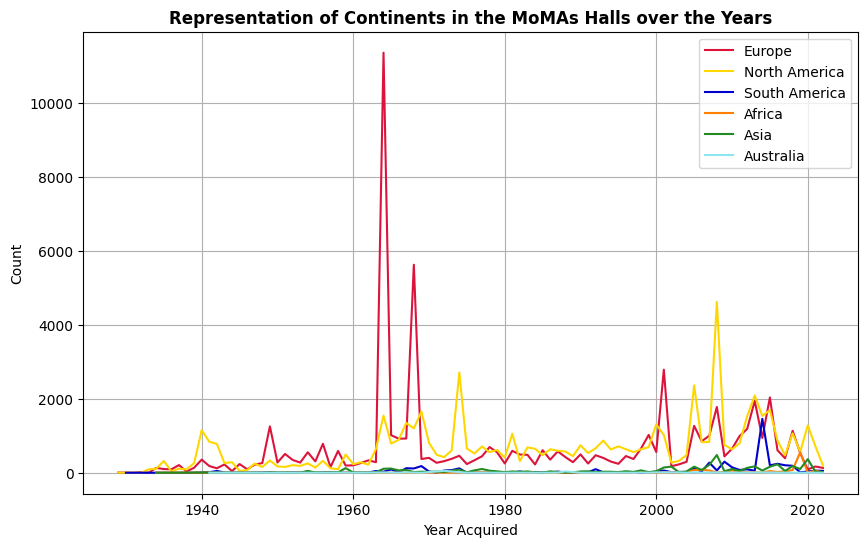

In [ ]:
# Grouping the data by YearAcquired and Continent and summing count
grouped_continent = grouped_nat.groupby(['YearAcquired', 'Continent'])['Count'].sum().reset_index()

# Getting unique continents for the lines
continents = grouped_continent['Continent'].unique()

color_palette = ['#DC143C', '#FFD700', '#0000CD', '#FF7F00', '#228B22', '#8EE5EE']

# Creating a line plot for each continent
plt.figure(figsize=(10, 6))
for i, continent in enumerate(continents):
    continent_data = grouped_continent[grouped_continent['Continent'] == continent]
    plt.plot(continent_data['YearAcquired'], continent_data['Count'], label=continent, color=color_palette[i])

plt.xlabel('Year Acquired')
plt.ylabel('Count')
plt.title('Representation of Continents in the MoMAs Halls over the Years', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
grouped_continent.groupby('Continent')['Count'].sum()

Continent
Africa            1280
Asia              4706
Australia          281
Europe           62323
North America    63093
South America     5176
Name: Count, dtype: int64

In [ ]:
grouped_continent['YearAcquired'].max()

2022

In [ ]:
grouped_continent['YearAcquired'].min()

1929

In [ ]:
# Checking to see changes in continent wise representation in 2019 and onwards
grouped_continent[grouped_continent['YearAcquired'].isin([2019, 2020, 2021, 2022])].groupby(['YearAcquired', 'Continent'])['Count'].sum().reset_index()

YearAcquired      Continent  Count
0           2019         Africa    558
1           2019           Asia    101
2           2019      Australia      4
3           2019         Europe    533
4           2019  North America    565
5           2019  South America     13
6           2020         Africa      2
7           2020           Asia    368
8           2020         Europe     91
9           2020  North America   1283
10          2020  South America     34
11          2021         Africa     60
12          2021           Asia     33
13          2021      Australia      2
14          2021         Europe    169
15          2021  North America    721
16          2021  South America     58
17          2022         Africa     10
18          2022           Asia     16
19          2022      Australia      1
20          2022         Europe    131
21          2022  North America    199
22          2022  South America     51

In [ ]:
# Now, onto Gender representation over the years
shifts_gen = shifts_df[['YearAcquired','Gender']]
shifts_gen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132134 entries, 0 to 140847
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   YearAcquired  132134 non-null  int64 
 1   Gender        132134 non-null  object
dtypes: int64(1), object(1)
memory usage: 7.1+ MB


In [ ]:
shifts_gen['Gender'].value_counts().to_frame()

Gender
(Male)                                              101089
(Female)                                             17669
()                                                    6113
(Male) (Male)                                         1615
(Male) (Male) (Male)                                  1064
...                                                    ...
(Female) (Male) (Male) (Male) (Male) (Male) (Ma...       1
() (Female) (Female) (Female)                            1
() (Female) (Male) (Female) (Male) (Female) (Ma...       1
() (Male) (Male) (Male) (Male) (Male) (Female) ...       1
() (Male) (Female) (Male) (Male) (Female) (Fema...       1

[401 rows x 1 columns]

In [ ]:
# Cleaning data in the Gender column and stripping brackets
shifts_gen["Cleaned_Genders"] = shifts_gen["Gender"].apply(
    lambda x: [gen.strip() for gen in x.strip("()").split("(") if gen]
)

# Repeating YearAcquired values for each value of Gender
expanded_data2 = []
for _, row in shifts_gen.iterrows():
    yearacquired = row["YearAcquired"]
    gender = row["Cleaned_Genders"]
    for gen in gender:
        expanded_data2.append({"YearAcquired": yearacquired, "Gender": gen})

expandeddf = pd.DataFrame(expanded_data2)
expandeddf['Gender'] = expandeddf['Gender'].apply(
    lambda gen: gen.lstrip("(").rstrip(")") if isinstance(gen, str) else gen
)
expandeddf

<ipython-input-98-207c4a0b56d0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



YearAcquired Gender
0               1996   Male
1               1995   Male
2               1997   Male
3               1995   Male
4               1997   Male
...              ...    ...
139743          2020   Male
139744          2020   Male
139745          2020   Male
139746          2020   Male
139747          2020   Male

[139748 rows x 2 columns]

In [ ]:
expandeddf['Gender'].value_counts().to_frame()

Gender
Male        116364
Female       21223
              2101
male            45
Non-Binary      12
female           2
Non-binary       1

In [ ]:
# Removing row with empty index value
expandeddf.drop(expandeddf.loc[expandeddf['Gender']==''].index, inplace=True)

In [ ]:
# Normalizing values in the gender column to account for spelling differences
expandeddf['Gender']= expandeddf['Gender'].str.lower().str.title()
expandeddf['Gender'].value_counts().to_frame()

Gender
Male        116409
Female       21225
Non-Binary      13

In [ ]:
# Grouping by YearAcquired and counting genders represented each year
grouped_gen = expandeddf.groupby(['YearAcquired']).value_counts(['Gender']).to_frame().reset_index()
new_columnnames = ['YearAcquired', 'Gender', 'Count']

grouped_gen.columns = new_columnnames
grouped_gen

YearAcquired      Gender  Count
0            1929        Male      9
1            1930        Male      7
2            1931        Male      3
3            1932        Male     18
4            1932      Female      1
..            ...         ...    ...
185          2020  Non-Binary      1
186          2021      Female    558
187          2021        Male    469
188          2022        Male    194
189          2022      Female    142

[190 rows x 3 columns]

### Line Graph showing Gender Representation over the years

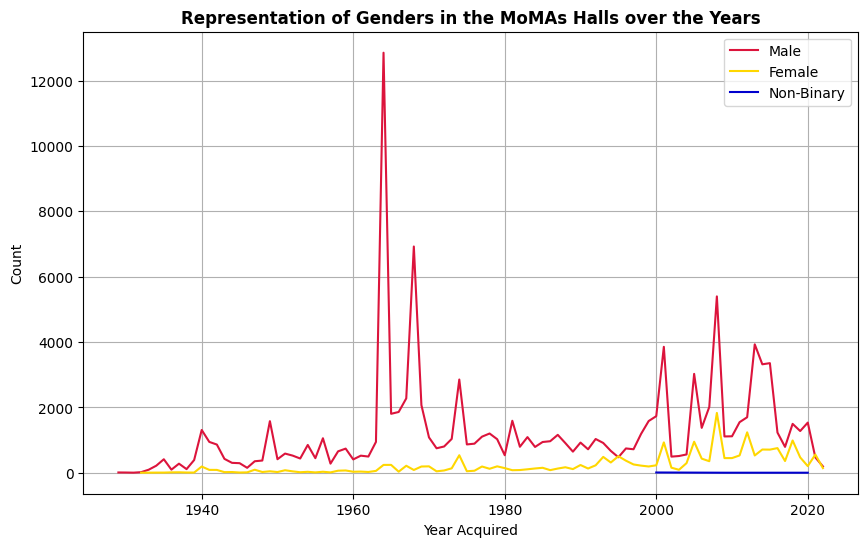

In [ ]:
# Making line graph for genders
# Group your data by YearAcquired and Continent and calculate the total count
grouped_gen = grouped_gen.groupby(['YearAcquired', 'Gender'])['Count'].sum().reset_index()

unique_genders = grouped_gen['Gender'].unique()

color_palette = ['#DC143C', '#FFD700', '#0000CD']

plt.figure(figsize=(10, 6))
for i, genders in enumerate(unique_genders):
    gender_data = grouped_gen[grouped_gen['Gender'] == genders]
    plt.plot(gender_data['YearAcquired'], gender_data['Count'], label=genders, color=color_palette[i])

plt.xlabel('Year Acquired')
plt.ylabel('Count')
plt.title('Representation of Genders in the MoMAs Halls over the Years', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
grouped_gen['YearAcquired'].max()

2022

In [ ]:
grouped_gen['YearAcquired'].min()

1929

In [ ]:
# Checking to see changes in gender wise representation in 2019 and onwards
grouped_gen[grouped_gen['YearAcquired'].isin([2019, 2020, 2021, 2022])].groupby(['YearAcquired', 'Gender'])['Count'].sum().reset_index()

YearAcquired      Gender  Count
0          2019      Female    470
1          2019        Male   1277
2          2020      Female    203
3          2020        Male   1535
4          2020  Non-Binary      1
5          2021      Female    558
6          2021        Male    469
7          2022      Female    142
8          2022        Male    194